In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from matplotlib.colors import ListedColormap

import pandas as pd
from datetime import datetime as dt

from scipy.stats.mstats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [36]:
#Define palette
pal = ["#274D60","#6BA3BE","#0C969C","#0A7075","#032F30", "#031716"]
cmap = ListedColormap(pal)
palette = pal

from matplotlib.colors import LinearSegmentedColormap
pal_1 = ["#032F30","#0A7075","#0C969C","#fff9e6","#ffebc6","#fcd997","#f5b971"]
palette_1 = pal_1

reversed_pal_1 = pal_1[::-1]

cmap_1 = LinearSegmentedColormap.from_list("reversed_blue_green_cmap", reversed_pal_1)

In [37]:
plt.rcParams['font.family'] = 'Times New Roman'

In [38]:
transaction=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/transaction.csv', index_col=0)
customer=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/customer_data_segmented.csv', index_col=0)
newwcustomer=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/newcustomerlist.csv', index_col=0)

In [39]:
transaction.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                  bool
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date     object
dtype: object

cus

In [40]:
customer

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,3018.09,1708.37,165.85,185.70,768.89,189.28,0.00,110,1.100000,3
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,...,2226.26,448.68,0.00,0.00,0.00,0.00,1777.58,160,1.600000,2
2,4,Talbot,Unknown,Male,33,1961-10-03,Others,IT,Mass Customer,No,...,220.57,41.13,0.00,0.00,179.44,0.00,0.00,63,0.777778,2
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,No,...,2394.94,1230.27,385.56,0.00,574.62,75.48,129.01,32,2.000000,0
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,No,...,3946.55,1113.55,0.00,0.00,0.00,143.36,2689.64,117,1.444444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,No,...,2045.84,0.00,318.66,0.00,1612.25,114.93,0.00,171,2.111111,2
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,No,...,1648.32,1504.50,0.00,0.00,143.82,0.00,0.00,90,3.600000,2
3409,3498,Lois,Abrahim,Female,28,1995-11-02,Others,Manufacturing,Mass Customer,No,...,3147.33,0.00,0.00,456.45,1434.00,143.36,1113.52,20,1.250000,1
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Others,Manufacturing,Mass Customer,No,...,4955.25,880.01,167.21,0.00,616.90,0.00,3291.13,63,0.777778,3


In [41]:
customer.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
customer_age                             int64
recency                                  int64
frequency                                int64
monetary                               float64
Giant Bicycle

In [42]:
customer_df=customer.copy()

In [43]:
customer_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,3018.09,1708.37,165.85,185.70,768.89,189.28,0.00,110,1.100000,3
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,...,2226.26,448.68,0.00,0.00,0.00,0.00,1777.58,160,1.600000,2
2,4,Talbot,Unknown,Male,33,1961-10-03,Others,IT,Mass Customer,No,...,220.57,41.13,0.00,0.00,179.44,0.00,0.00,63,0.777778,2
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,No,...,2394.94,1230.27,385.56,0.00,574.62,75.48,129.01,32,2.000000,0
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,No,...,3946.55,1113.55,0.00,0.00,0.00,143.36,2689.64,117,1.444444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,No,...,2045.84,0.00,318.66,0.00,1612.25,114.93,0.00,171,2.111111,2
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,No,...,1648.32,1504.50,0.00,0.00,143.82,0.00,0.00,90,3.600000,2
3409,3498,Lois,Abrahim,Female,28,1995-11-02,Others,Manufacturing,Mass Customer,No,...,3147.33,0.00,0.00,456.45,1434.00,143.36,1113.52,20,1.250000,1
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Others,Manufacturing,Mass Customer,No,...,4955.25,880.01,167.21,0.00,616.90,0.00,3291.13,63,0.777778,3


In [ ]:
customer_df['DOB'] = pd.to_datetime(customer_df['DOB'])
customer_df['deceased_indicator'] = customer_df['deceased_indicator'].map({'Y': 'Yes', 'N': 'No'})
customer_df['postcode'] = customer_df['postcode'].astype(str)
customer_df['clusters'] = customer_df['clusters'].astype('category')


In [48]:
customer_df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                       object
state                                          object
country                                        object
property_valuation                              int64
customer_age                                    int64
recency                     

# Order Analyst

In [ ]:
transaction_df = pd.merge(transaction, customer_df, how='inner', left_on='customer_id', right_on='customer_id')

In [109]:
transaction_df.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                               object
online_order                                     bool
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                   

In [111]:
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

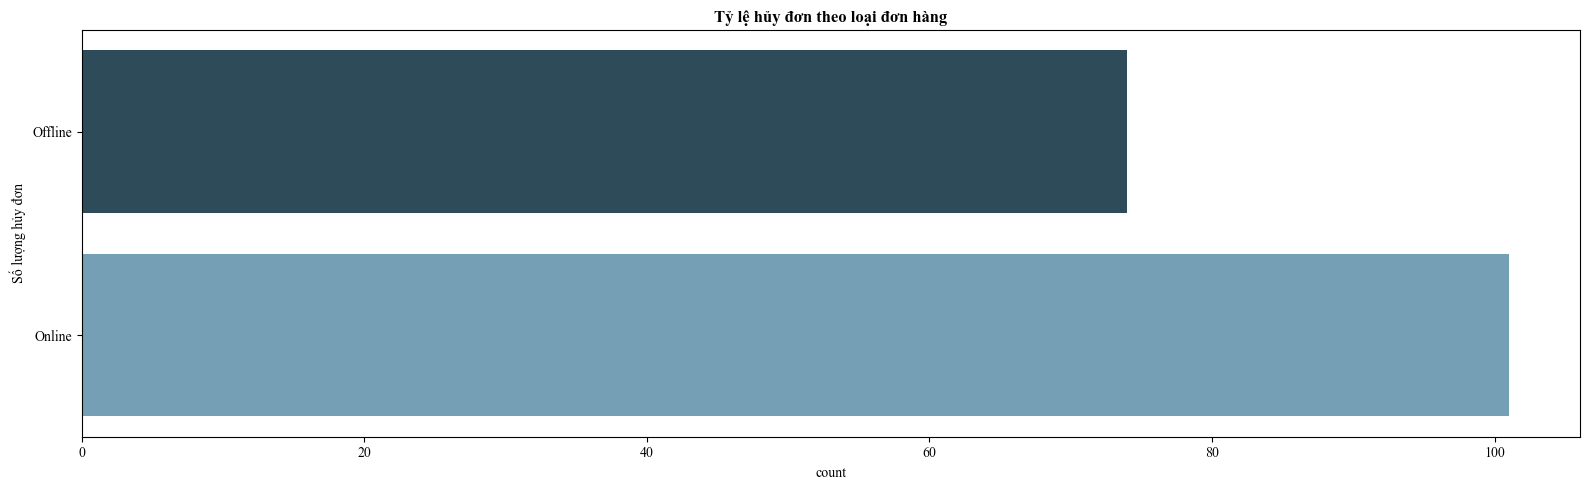

In [ ]:
cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']
cancelled_orders_df['order_type'] = cancelled_orders_df['online_order'].apply(lambda x: 'Online' if x else 'Offline')

plt.figure(figsize=(16, 5))
sns.countplot(data=cancelled_orders_df, y='order_type', palette=pal, orient='h')

plt.title('Tỷ lệ hủy đơn theo loại đơn hàng', fontweight='bold')
plt.ylabel('Loại đơn hàng')
plt.xlabel('Số lượng hủy đơn')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


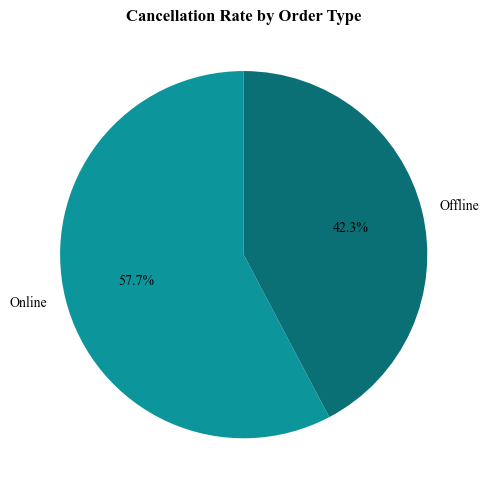

In [124]:
# Filter cancelled orders
cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']

# Add a new column 'order_type' to classify orders as 'Online' or 'Offline'
cancelled_orders_df['order_type'] = cancelled_orders_df['online_order'].apply(lambda x: 'Online' if x else 'Offline')

# Count the number of cancelled orders by order type
order_type_counts = cancelled_orders_df['order_type'].value_counts()

# Plot a pie chart for the cancellation rate by order type
plt.figure(figsize=(5, 5))
plt.pie(order_type_counts, labels=order_type_counts.index, autopct='%1.1f%%', startangle=90, colors=pal[2:4])
plt.title('Cancellation Rate by Order Type', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


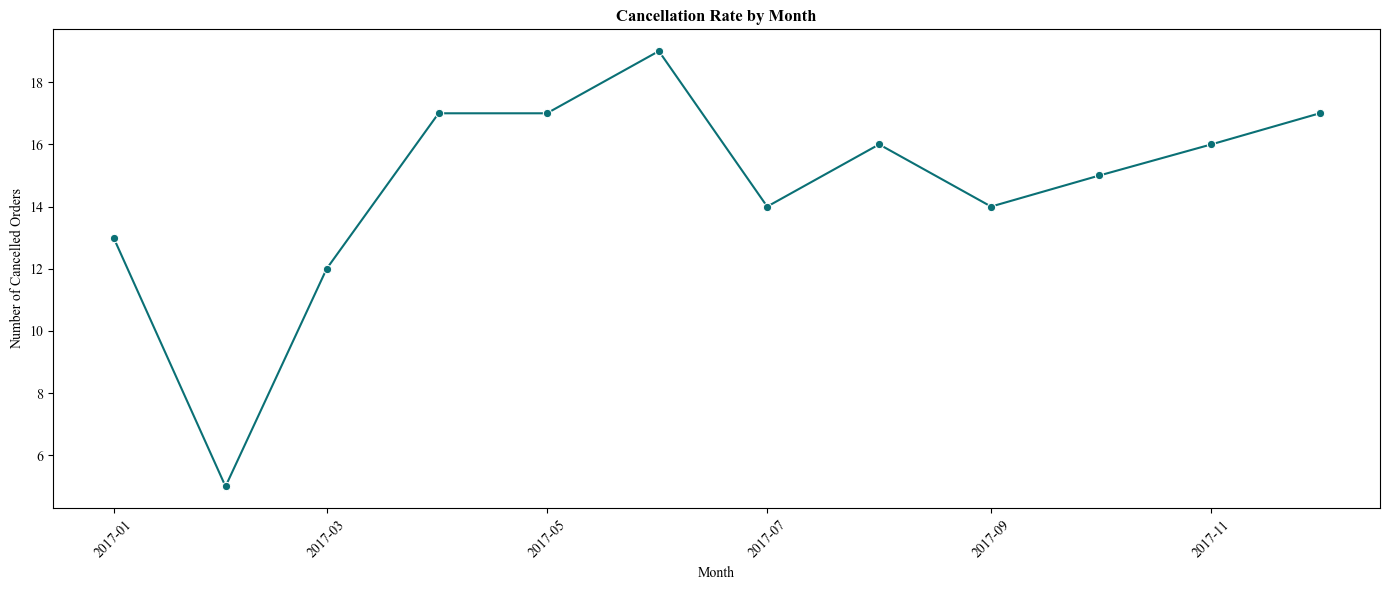

In [120]:
transaction_df['month_year'] = transaction_df['transaction_date'].dt.to_period('M')
transaction_df['month_year'] = transaction_df['month_year'].dt.to_timestamp()
cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']
cancelled_orders_by_month = cancelled_orders_df.groupby('month_year').size().reset_index(name='cancelled_count')


plt.figure(figsize=(14, 6))
sns.lineplot(x='month_year', y='cancelled_count', data=cancelled_orders_by_month, marker='o', color=pal[3])

plt.title('Cancellation Rate by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [128]:
transaction_df.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                     bool
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                   

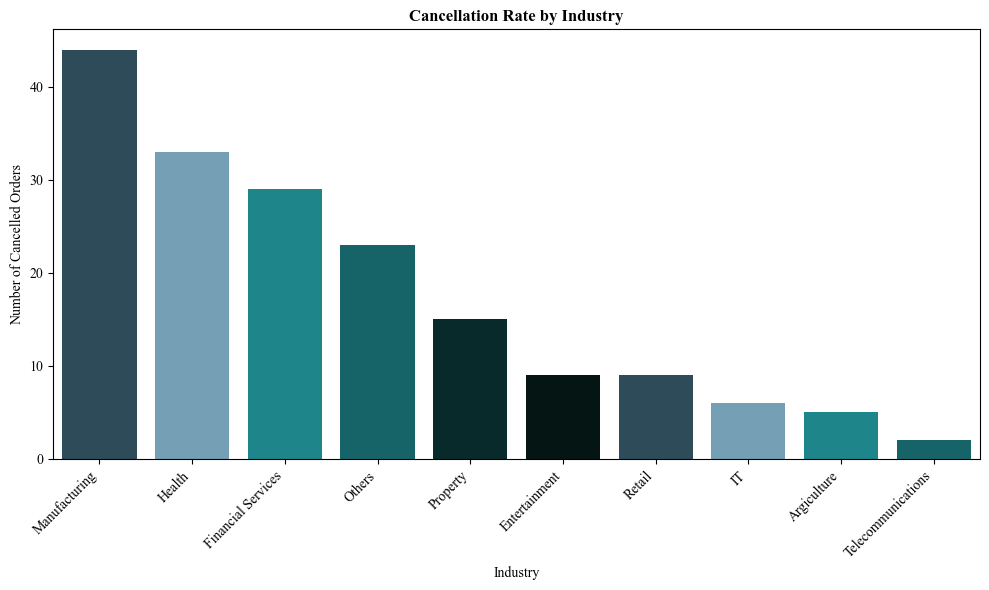

In [ ]:
cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']

industry_counts = cancelled_orders_df['job_industry_category'].value_counts().reset_index(name='cancelled_count')
industry_counts.columns = ['Industry', 'Cancelled Orders']  

plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Cancelled Orders', data=industry_counts, palette=pal)
plt.title('Cancellation Rate by Industry', fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Number of Cancelled Orders')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

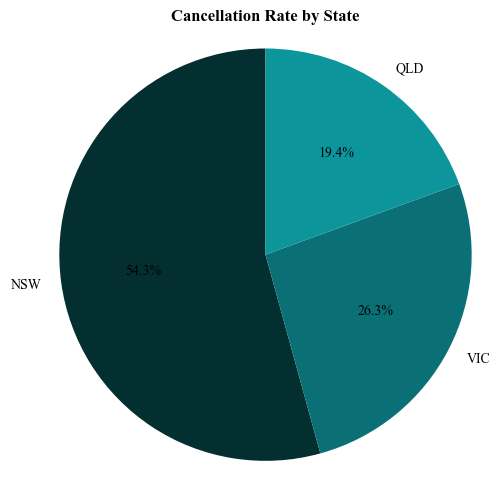

In [140]:
state_counts = cancelled_orders_df['state'].value_counts()

# Plot a pie chart for the cancellation rate by state
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=pal_1[:len(state_counts)])
plt.title('Cancellation Rate by State', fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()


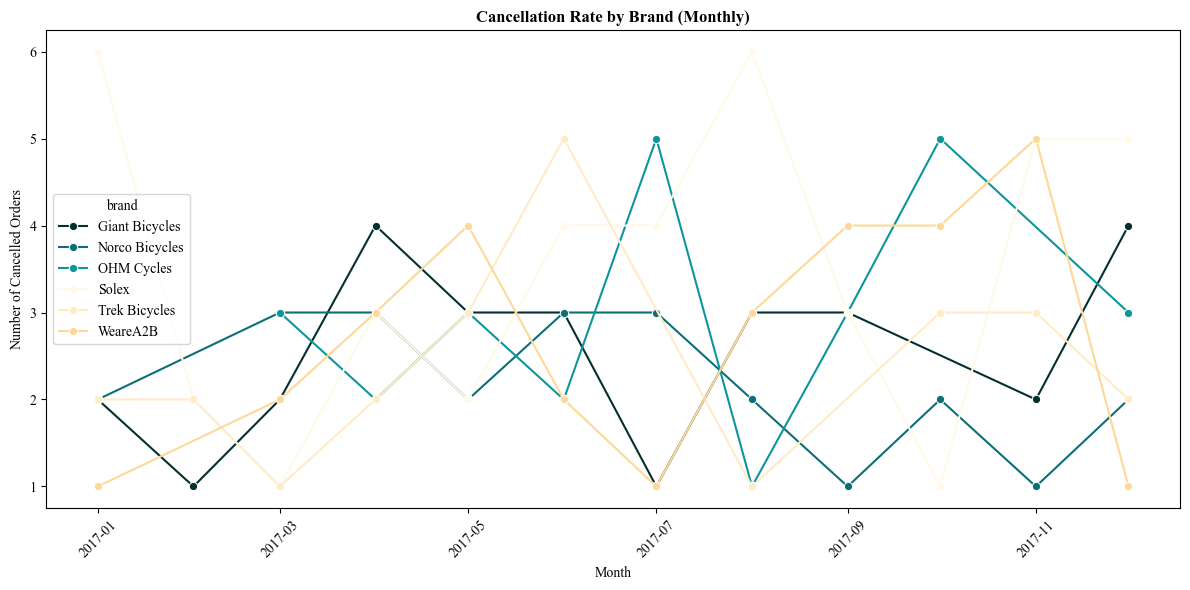

In [ ]:
monthly_cancellations = cancelled_orders_df.groupby(['brand', 'month_year']).size().reset_index(name='cancelled_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancellations, x='month_year', y='cancelled_count', hue='brand', marker='o', palette=pal_1)
plt.title('Cancellation Rate by Brand (Monthly)', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Orders')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']
sankey_data = cancelled_orders_df.groupby(['product_class', 'brand']).size().reset_index(name='count')

labels = ['Cancelled Orders'] + list(sankey_data['product_class'].unique()) + list(sankey_data['brand'].unique())

product_class_indices = [labels.index(pc) for pc in sankey_data['product_class']]
brand_indices = [labels.index(brand) for brand in sankey_data['brand']]

sources = [0] * len(sankey_data)  
targets = product_class_indices + brand_indices  

values = sankey_data['count'].values.tolist() * 2  

sankey_fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels
    ),
    link=dict(
        source=sources + product_class_indices, 
        target=product_class_indices + brand_indices,  
        value=values
    )
))

sankey_fig.update_layout(title_text="Sankey Diagram: Cancellation Rate, Product Class, and Brand", font_size=10)

sankey_fig.show()


In [ ]:
cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']
sankey_data = cancelled_orders_df.groupby(['product_line', 'product_class', 'brand']).size().reset_index(name='count')

labels = ['Cancelled Orders'] + list(sankey_data['product_line'].unique()) + list(sankey_data['product_class'].unique()) + list(sankey_data['brand'].unique())

product_line_indices = [labels.index(pl) for pl in sankey_data['product_line']]
product_class_indices = [labels.index(pc) for pc in sankey_data['product_class']]
brand_indices = [labels.index(brand) for brand in sankey_data['brand']]

sources = [0] * len(sankey_data)  
targets = product_line_indices + product_class_indices + brand_indices 
values = sankey_data['count'].values.tolist() * 3  

node_colors = pal[:len(sankey_data['product_line'].unique()) + len(sankey_data['product_class'].unique()) + len(sankey_data['brand'].unique())]
node_colors = [node_colors[i % len(node_colors)] for i in range(len(labels))]

sankey_fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,  
        color=node_colors 
    ),
    link=dict(
        source=sources + product_line_indices + product_class_indices,  
        target=product_line_indices + product_class_indices + brand_indices, 
        value=values,
    )
))

sankey_fig.update_layout(title_text="Sankey Diagram: Cancellation Rate, Product Line, Product Class, and Brand", font_size=10)

sankey_fig.show()


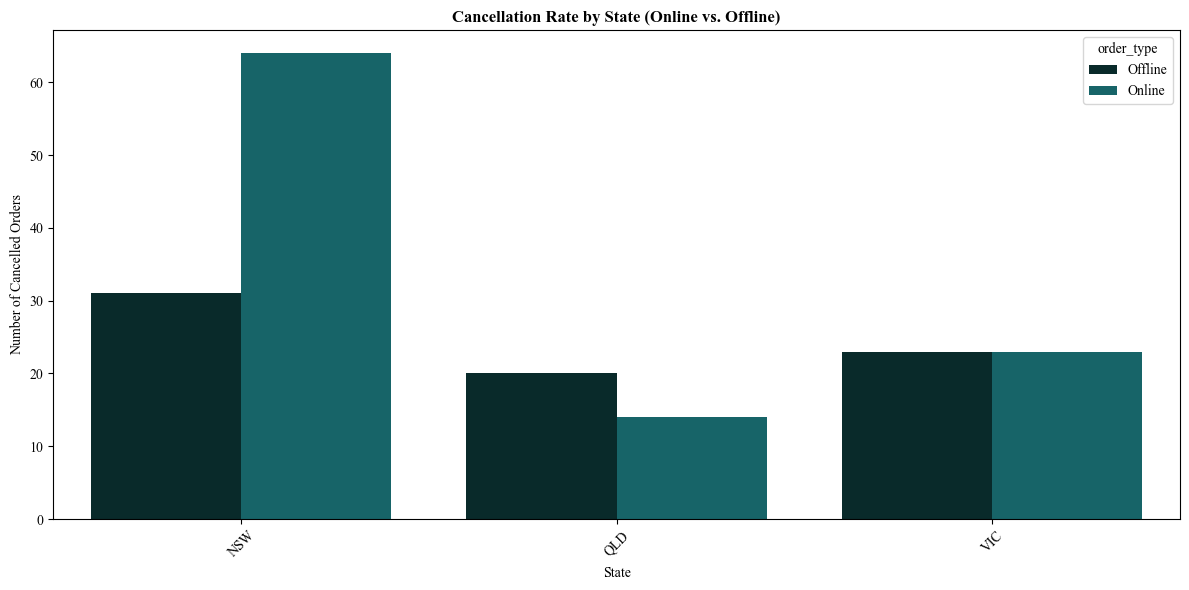

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cancelled_orders_df = transaction_df[transaction_df['order_status'] == 'Cancelled']

cancelled_orders_df['order_type'] = cancelled_orders_df['online_order'].apply(lambda x: 'Online' if x else 'Offline')

state_order_type_counts = cancelled_orders_df.groupby(['state', 'order_type']).size().reset_index(name='cancelled_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='cancelled_count', hue='order_type', data=state_order_type_counts, palette=pal_1)
plt.title('Cancellation Rate by State (Online vs. Offline)', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Cancelled Orders')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Customer Analyst

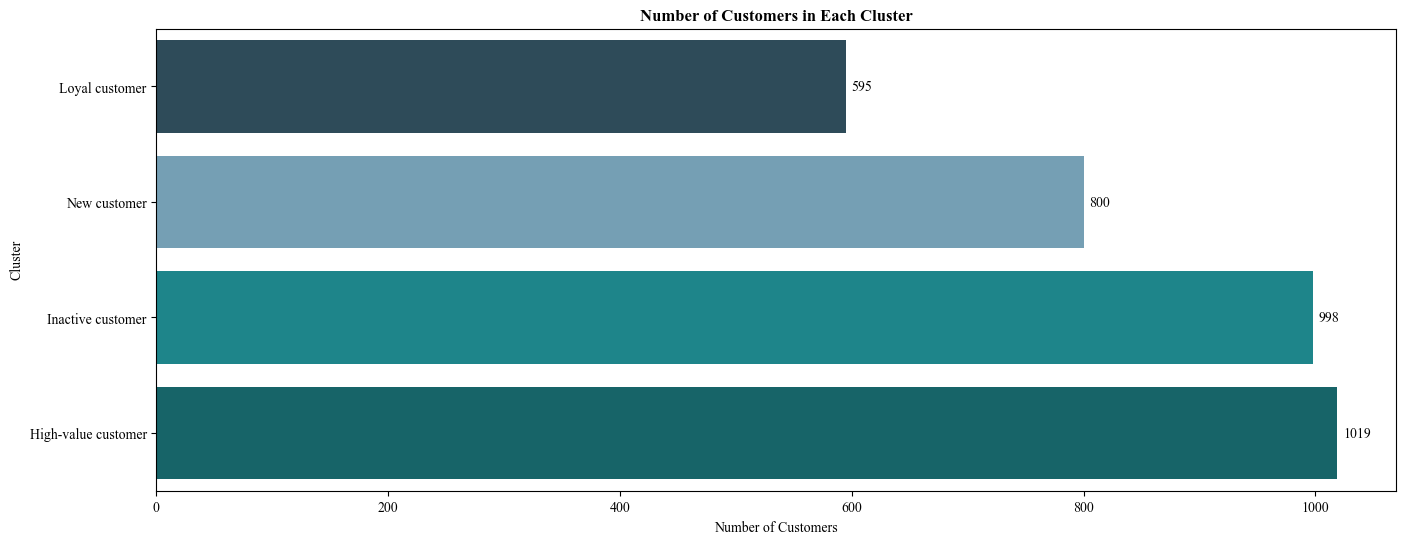

In [ ]:
cluster_names = {
    0: 'Loyal customer',
    1: 'New customer',
    2: 'Inactive customer',
    3: 'High-value customer'
}
customer_df['cluster_name'] = customer_df['clusters'].map(cluster_names)
cluster_counts_named = customer_df['cluster_name'].value_counts().reindex(cluster_names.values(), fill_value=0)

plt.figure(figsize=(16, 6))
sns.barplot(x=cluster_counts_named.values, y=cluster_counts_named.index, palette=pal)
plt.title('Number of Customers in Each Cluster', fontweight='bold')
plt.ylabel('Cluster')
plt.xlabel('Number of Customers')
plt.yticks(ha='right')

for index, value in enumerate(cluster_counts_named.values):
    plt.text(value + 5, index, str(value), va='center')

plt.show()

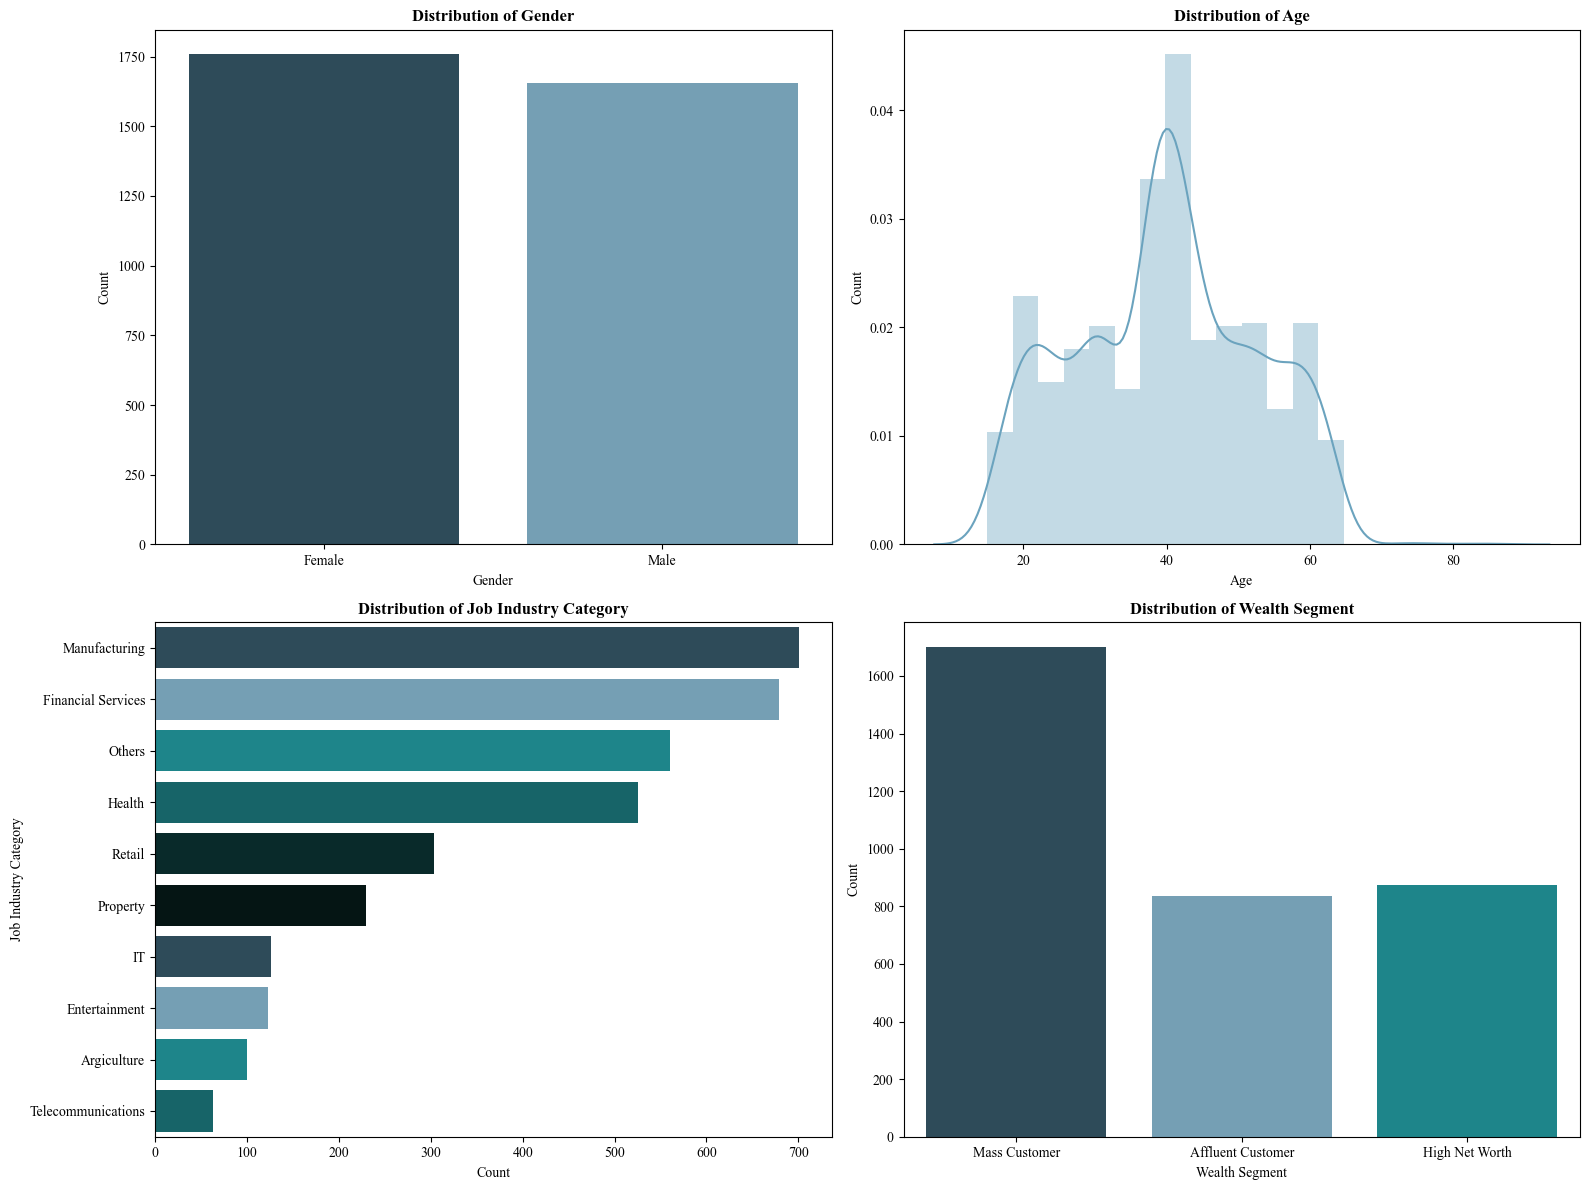

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(ax=axes[0, 0], data=customer_df, x='gender', palette=pal)
axes[0, 0].set_title('Distribution of Gender', fontweight='bold')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

sns.distplot(customer_df['customer_age'], bins=20, kde=True, color=pal[1], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age', fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

sns.countplot(ax=axes[1, 0], data=customer_df, y='job_industry_category', palette=pal, order=customer_df['job_industry_category'].value_counts().index)
axes[1, 0].set_title('Distribution of Job Industry Category', fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Job Industry Category')

sns.countplot(ax=axes[1, 1], data=customer_df, x='wealth_segment', palette=pal)
axes[1, 1].set_title('Distribution of Wealth Segment', fontweight='bold')
axes[1, 1].set_xlabel('Wealth Segment')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()

plt.show()

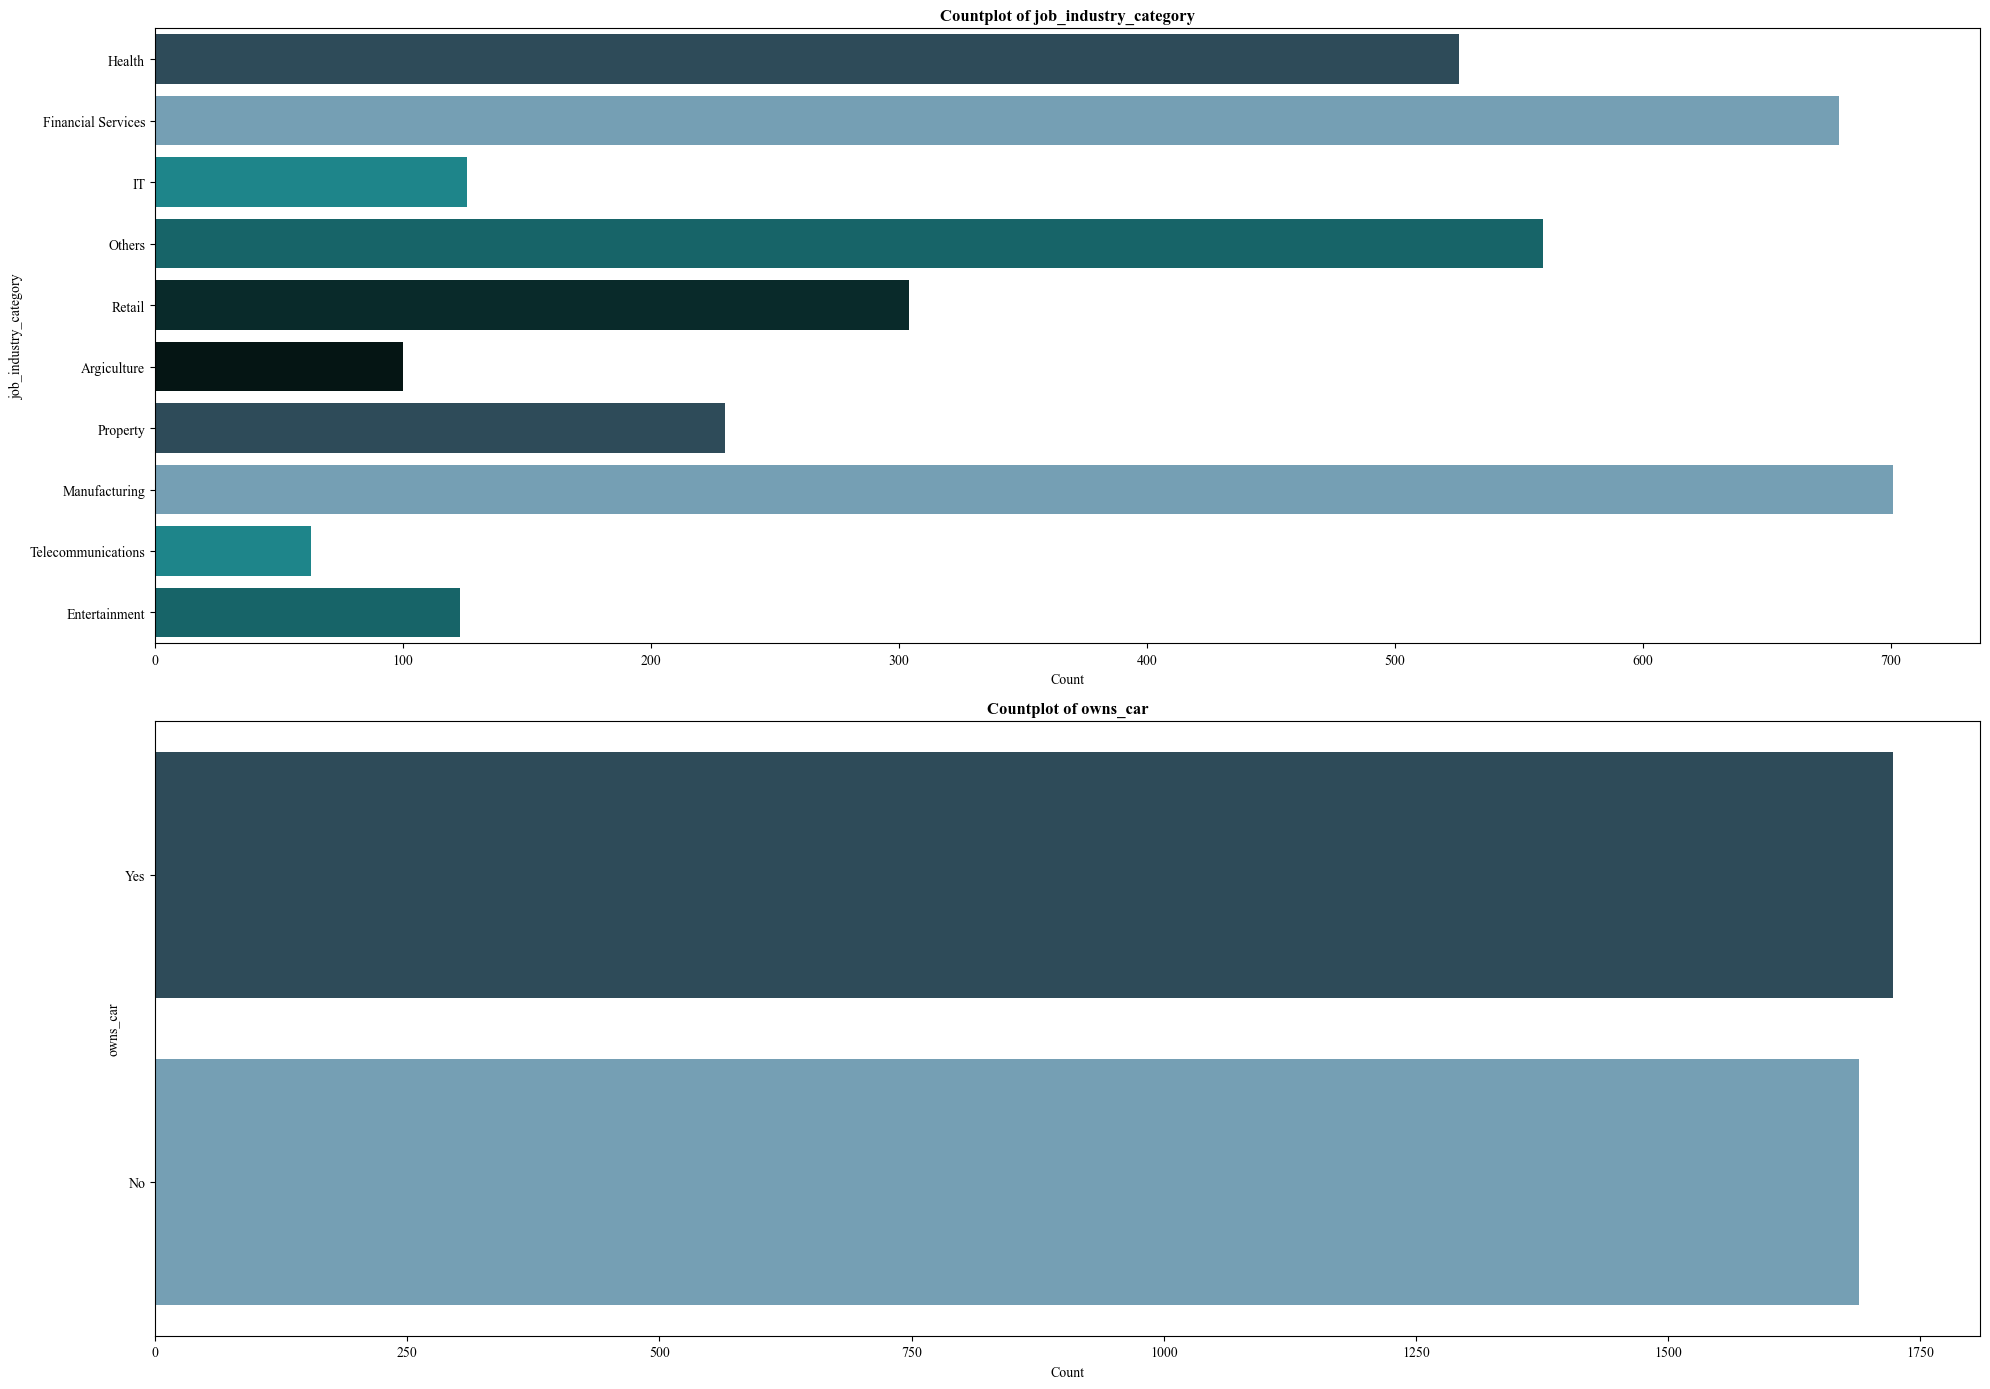

In [ ]:

categorical_vars = ["job_industry_category", "owns_car"]

plt.figure(figsize=(20, 14))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(data=customer_df, y=var, palette=pal, orient='h')
    plt.title(f'Countplot of {var}', fontweight='bold')
    plt.ylabel(var)
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

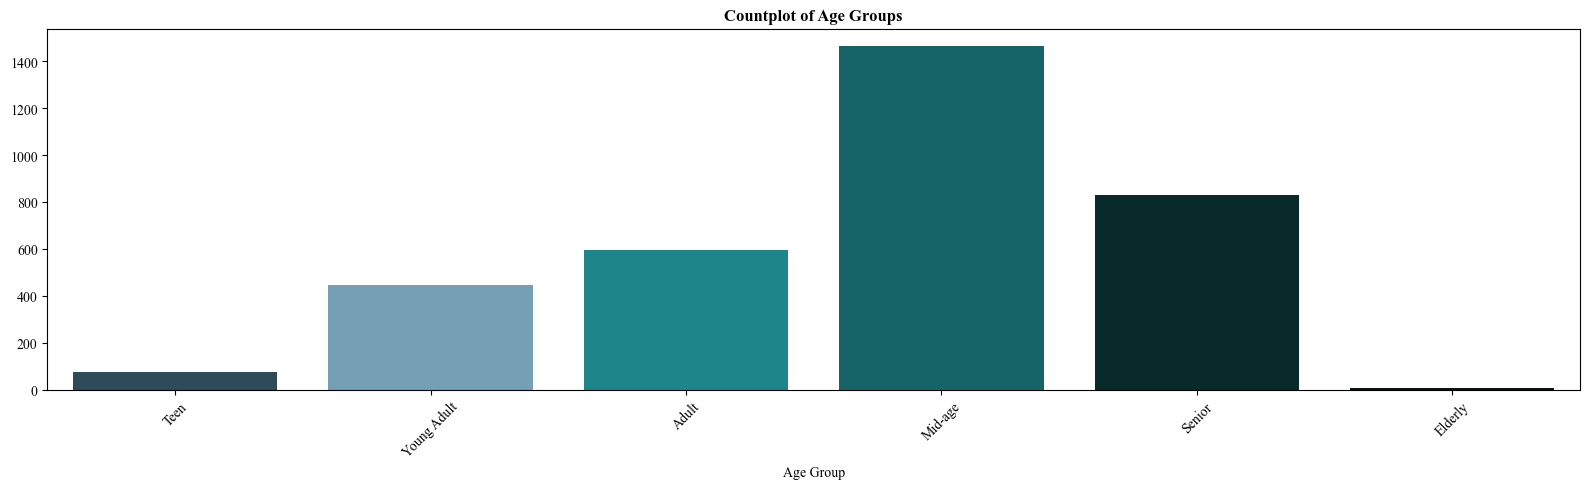

In [89]:
# Define age bins and labels
age_bins = [14, 18, 25, 35, 50, 65, 100]
age_labels = ['Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior', 'Elderly']

customer_df['age_group'] = pd.cut(customer_df['customer_age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(16, 5))

sns.countplot(data=customer_df, x='age_group', palette=palette)
plt.title('Countplot of Age Groups', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

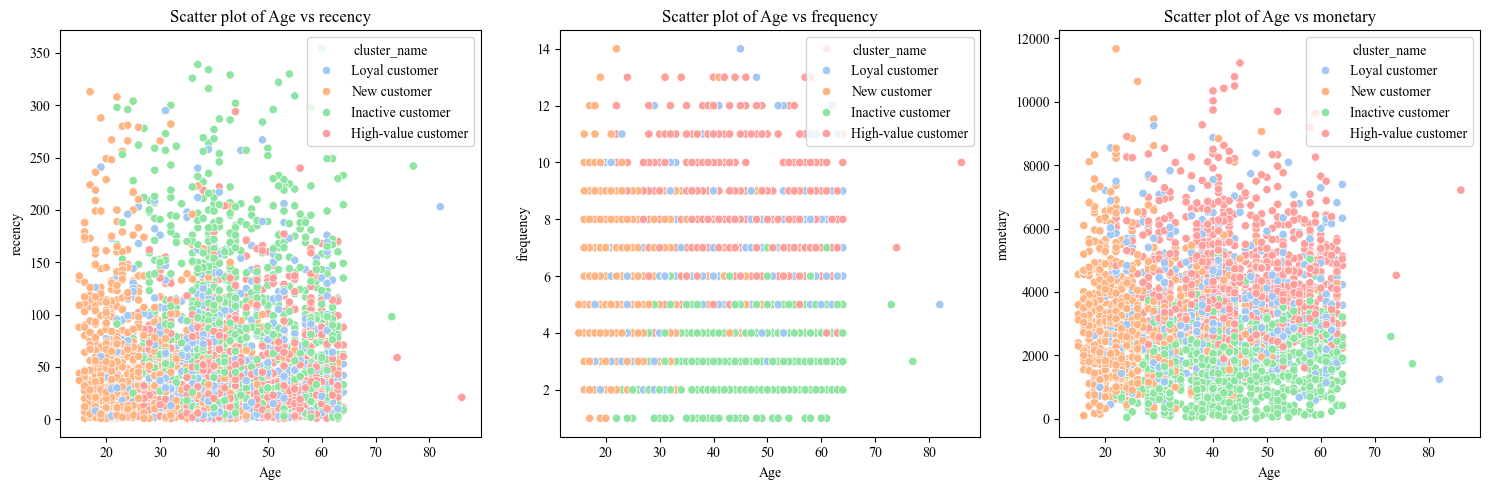

In [ ]:
behavioral_vars = ["recency", "frequency", "monetary"]

plt.figure(figsize=(15, 5))

for i, var in enumerate(behavioral_vars, 1):
    plt.subplot(1, len(behavioral_vars), i)
    sns.scatterplot(data=customer_df, x='customer_age', y=var, hue='cluster_name', palette="pastel")
    plt.title(f'Scatter plot of Age vs {var}')
    plt.xlabel('Age')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

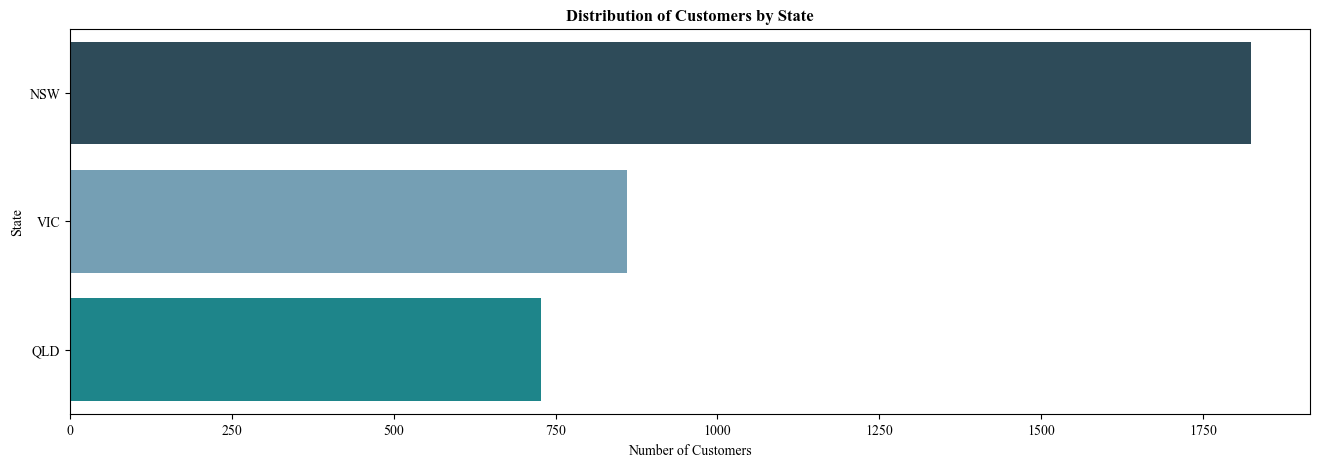

In [ ]:
state_counts = customer_df['state'].value_counts()

plt.figure(figsize=(16, 5))
sns.barplot(y=state_counts.index, x=state_counts.values, palette=pal, orient='h')
plt.title('Distribution of Customers by State', fontweight='bold')
plt.ylabel('State')
plt.xlabel('Number of Customers')

plt.show()

In [56]:
customer_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters,cluster_name,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,NaN,...,165.85,185.70,768.89,189.28,0.00,110,1.100000,3,High-value customer,Senior
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,NaN,...,0.00,0.00,0.00,0.00,1777.58,160,1.600000,2,Inactive customer,Mid-age
2,4,Talbot,Unknown,Male,33,1961-10-03,Others,IT,Mass Customer,NaN,...,0.00,0.00,179.44,0.00,0.00,63,0.777778,2,Inactive customer,Senior
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,NaN,...,385.56,0.00,574.62,75.48,129.01,32,2.000000,0,Loyal customer,Mid-age
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,NaN,...,0.00,0.00,0.00,143.36,2689.64,117,1.444444,3,High-value customer,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,NaN,...,318.66,0.00,1612.25,114.93,0.00,171,2.111111,2,Inactive customer,Adult
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,NaN,...,0.00,0.00,143.82,0.00,0.00,90,3.600000,2,Inactive customer,Adult
3409,3498,Lois,Abrahim,Female,28,1995-11-02,Others,Manufacturing,Mass Customer,NaN,...,0.00,456.45,1434.00,143.36,1113.52,20,1.250000,1,New customer,Young Adult
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Others,Manufacturing,Mass Customer,NaN,...,167.21,0.00,616.90,0.00,3291.13,63,0.777778,3,High-value customer,Mid-age


In [57]:
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-12
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19


In [58]:
transaction_df = pd.merge(transaction, customer_df, how='inner', left_on='customer_id', right_on='customer_id')


In [59]:
transaction_df[['product_first_sold_date', 'tenure','recency']]

,product_first_sold_date,tenure,recency
0,2012-12-04,10,76
1,2014-03-05,10,21
2,1999-07-22,22,57
3,1998-12-18,16,122
4,2015-08-12,2,76
...,...,...,...
19322,2003-07-23,7,27
19323,1997-05-12,19,24
19324,2010-08-22,14,35
19325,2004-08-19,20,52


In [60]:
import pandas as pd
import plotly.graph_objects as go

sankey_data = transaction_df.groupby(['state', 'brand']).agg({'transaction_id': 'count'}).reset_index()

states = sankey_data['state'].unique().tolist()
brands = sankey_data['brand'].unique().tolist()

labels = states + brands

source_indices = [labels.index(state) for state in sankey_data['state']]
target_indices = [labels.index(brand) for brand in sankey_data['brand']]
values = sankey_data['transaction_id'].tolist()

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=palette[:len(labels)]  
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
    )
))

fig.update_layout(
    title_text="Sankey Diagram: State vs Brand (Total Orders)",
    font=dict(family="Times New Roman", size=12), 
)
fig.show()


In [61]:
sankey_data = transaction_df.groupby(['state', 'product_class']).agg({'transaction_id': 'count'}).reset_index()

product_classes = sankey_data['product_class'].unique().tolist()
states = sankey_data['state'].unique().tolist()

labels = states + product_classes 

source_indices = [labels.index(state) for state in sankey_data['state']]  
target_indices = [labels.index(product_class) for product_class in sankey_data['product_class']]  
values = sankey_data['transaction_id'].tolist()

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=palette[:len(labels)] 
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(
    title_text="Sankey Diagram: State to Product Class (Total Orders)",
    font=dict(family="Times New Roman", size=12), 
)

fig.show()


In [ ]:
purchase_data = customer_df[['past_3_years_bike_related_purchases', 'Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B']]

purchase_data['total_bike_brand_purchases'] = purchase_data[['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B']].sum(axis=1)

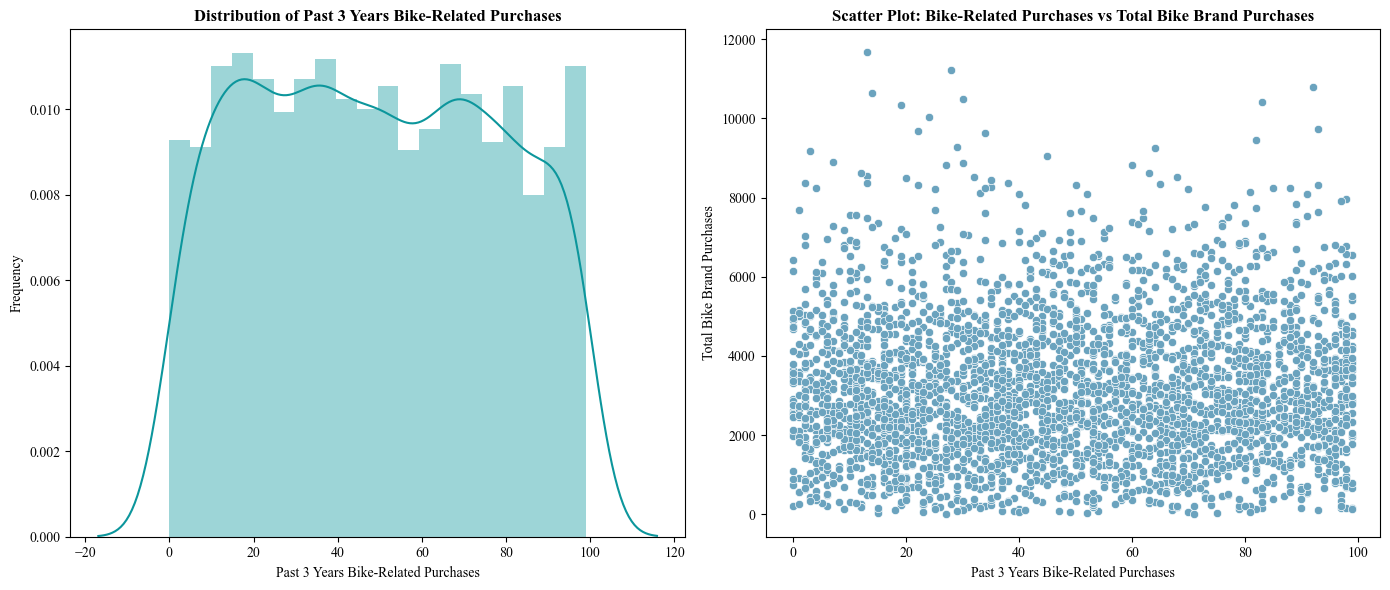

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.distplot(customer_df['past_3_years_bike_related_purchases'], bins=20, kde=True, ax=axes[0], color=pal[2])
axes[0].set_title('Distribution of Past 3 Years Bike-Related Purchases', fontweight = 'bold')
axes[0].set_xlabel('Past 3 Years Bike-Related Purchases')
axes[0].set_ylabel('Frequency')

sns.scatterplot(data=purchase_data, x='past_3_years_bike_related_purchases', y='total_bike_brand_purchases', ax=axes[1], color=pal[1])
axes[1].set_title('Scatter Plot: Bike-Related Purchases vs Total Bike Brand Purchases', fontweight = 'bold')
axes[1].set_xlabel('Past 3 Years Bike-Related Purchases')
axes[1].set_ylabel('Total Bike Brand Purchases')

plt.tight_layout()
plt.show()

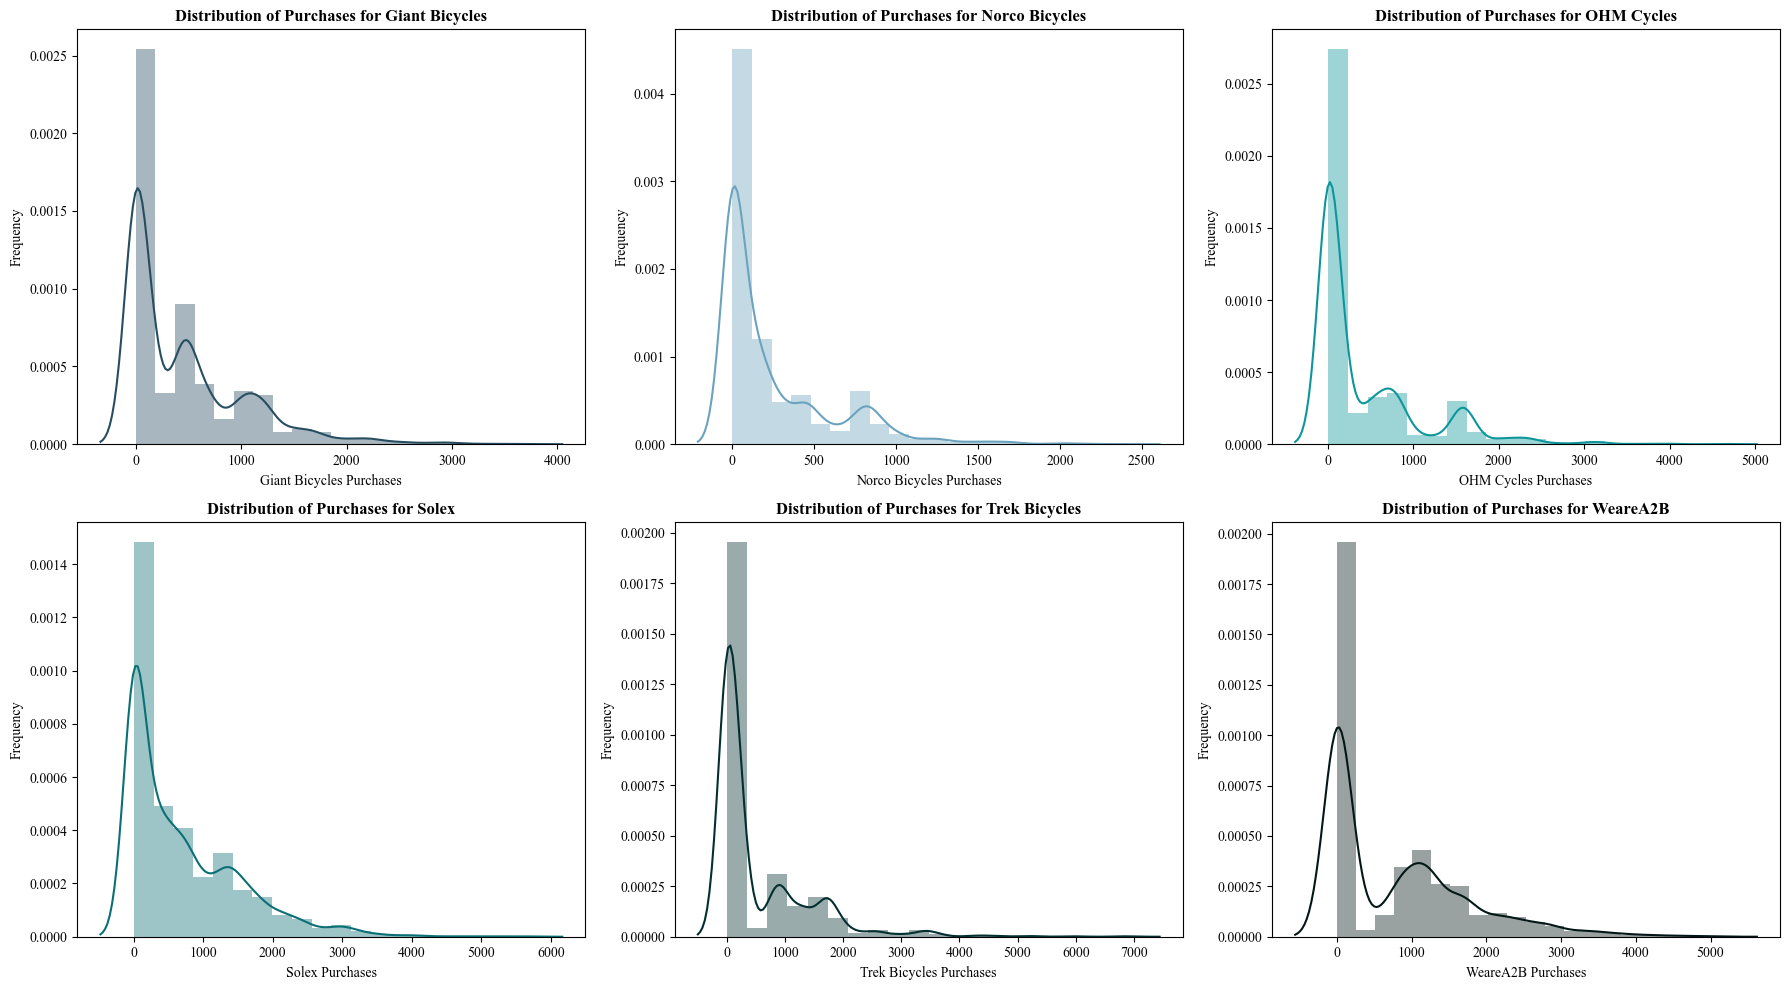

In [ ]:
plt.figure(figsize=(18, 10))
bike_brands = ['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B']

for i, brand in enumerate(bike_brands, 1):
    plt.subplot(2, 3, i)  
    sns.distplot(purchase_data[brand], bins=20, kde=True, color=pal[i-1])
    plt.title(f'Distribution of Purchases for {brand}', fontweight = 'bold')
    plt.xlabel(f'{brand} Purchases')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
rfm_analysis = customer_df.groupby('cluster_name').agg({
    'recency': ['mean', 'median', 'min', 'max'],
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary': ['mean', 'median', 'min', 'max']
}).reset_index()

rfm_analysis.columns = ['Cluster Name', 
                        'Recency Mean', 'Recency Median', 'Recency Min', 'Recency Max',
                        'Frequency Mean', 'Frequency Median', 'Frequency Min', 'Frequency Max',
                        'Monetary Mean', 'Monetary Median', 'Monetary Min', 'Monetary Max']

rfm_analysis

,Cluster Name,Recency Mean,Recency Median,Recency Min,Recency Max,Frequency Mean,Frequency Median,Frequency Min,Frequency Max,Monetary Mean,Monetary Median,Monetary Min,Monetary Max
0,Loyal customer,55.176471,41.0,1,295,5.994958,6.0,2,14,3438.621563,3249.020,419.68,9244.90
1,New customer,57.792500,43.0,1,313,5.772500,6.0,1,14,3084.157350,2790.905,96.62,11668.95
2,Inactive customer,90.677355,76.0,1,354,3.666333,4.0,1,7,1648.179248,1623.870,15.08,5289.22
3,High-value customer,43.327772,32.0,1,294,7.343474,7.0,3,14,4401.518724,4164.210,1500.49,11222.65


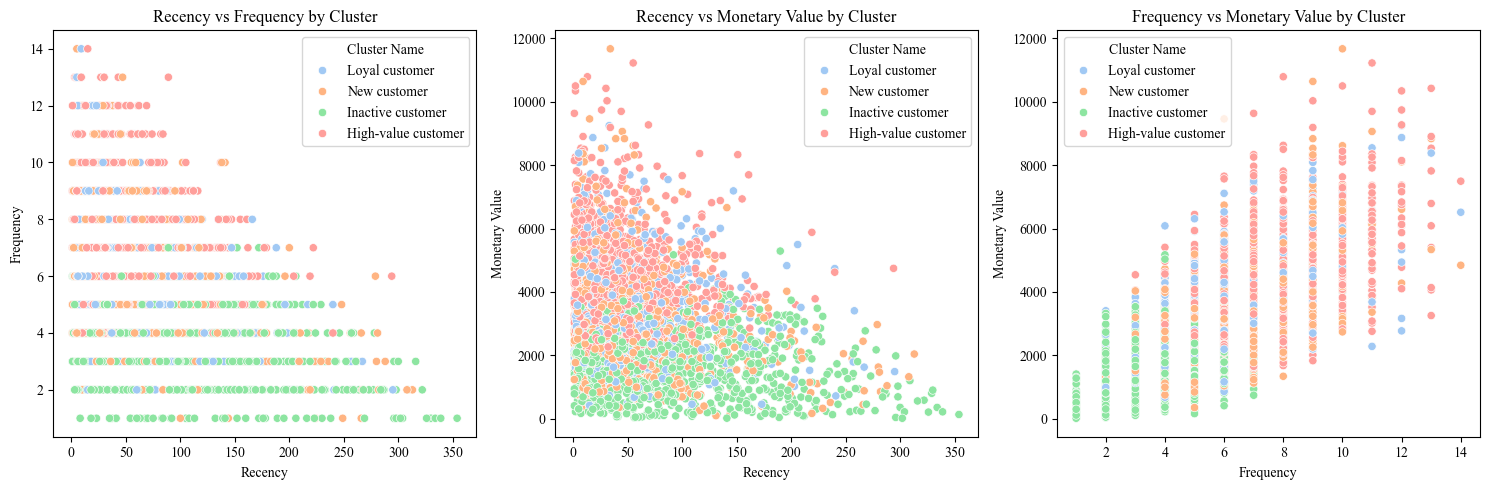

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_df, x="recency", y="frequency", hue="cluster_name", palette='pastel')
plt.title("Recency vs Frequency by Cluster")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend(title="Cluster Name")

plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_df, x="recency", y="monetary", hue="cluster_name", palette='pastel')
plt.title("Recency vs Monetary Value by Cluster")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster Name")

plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_df, x="frequency", y="monetary", hue="cluster_name", palette='pastel')
plt.title("Frequency vs Monetary Value by Cluster")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster Name")

plt.tight_layout()
plt.show()

In [67]:
customer_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'customer_age', 'recency', 'frequency',
       'monetary', 'Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B', 'tenure_valuation_mul',
       'tenure_valuation_div', 'clusters', 'cluster_name', 'age_group'],
      dtype='object')

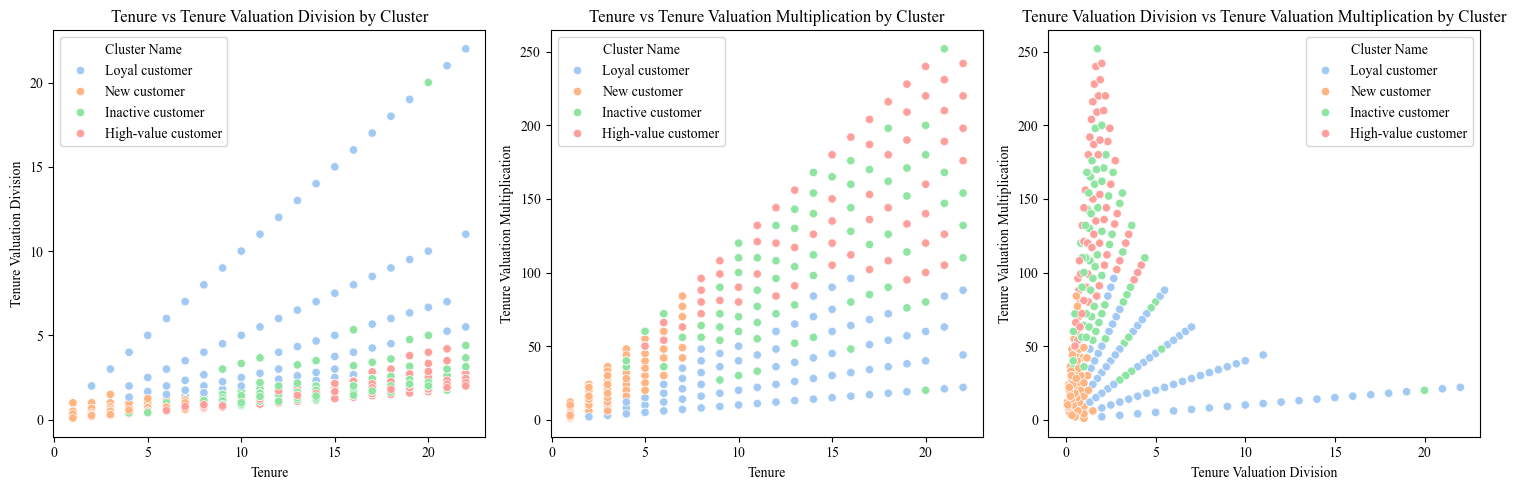

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_df, x="tenure", y="tenure_valuation_div", hue="cluster_name", palette='pastel')
plt.title("Tenure vs Tenure Valuation Division by Cluster")
plt.xlabel("Tenure")
plt.ylabel("Tenure Valuation Division")
plt.legend(title="Cluster Name")

plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_df, x="tenure", y="tenure_valuation_mul", hue="cluster_name", palette='pastel')
plt.title("Tenure vs Tenure Valuation Multiplication by Cluster")
plt.xlabel("Tenure")
plt.ylabel("Tenure Valuation Multiplication")
plt.legend(title="Cluster Name")

plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_df, x="tenure_valuation_div", y="tenure_valuation_mul", hue="cluster_name", palette='pastel')
plt.title("Tenure Valuation Division vs Tenure Valuation Multiplication by Cluster")
plt.xlabel("Tenure Valuation Division")
plt.ylabel("Tenure Valuation Multiplication")
plt.legend(title="Cluster Name")

plt.tight_layout()
plt.show()

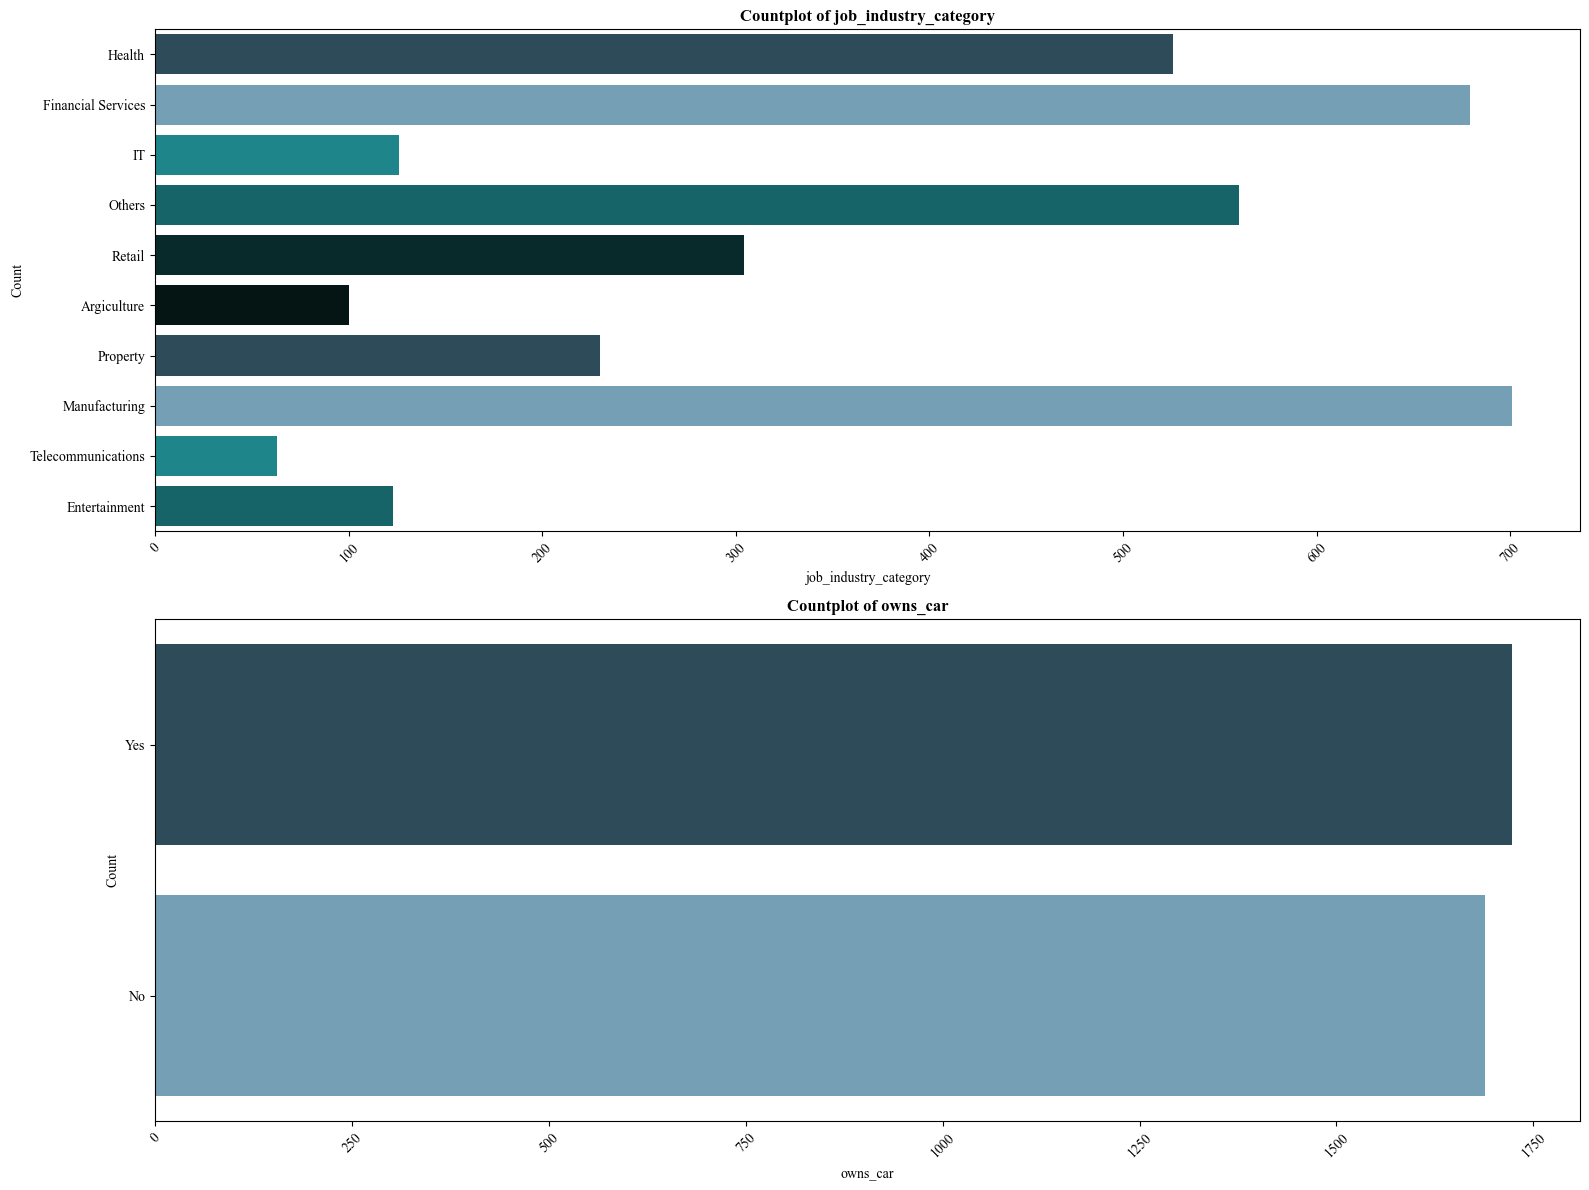

In [ ]:
categorical_vars = ["job_industry_category", "owns_car"]

plt.figure(figsize=(16, 12))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(data=customer_df, y=var, palette=palette, orient='h')
    plt.title(f'Countplot of {var}', fontweight='bold')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [71]:
customer_df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                       object
state                                          object
country                                        object
property_valuation                              int64
customer_age                                    int64
recency                     

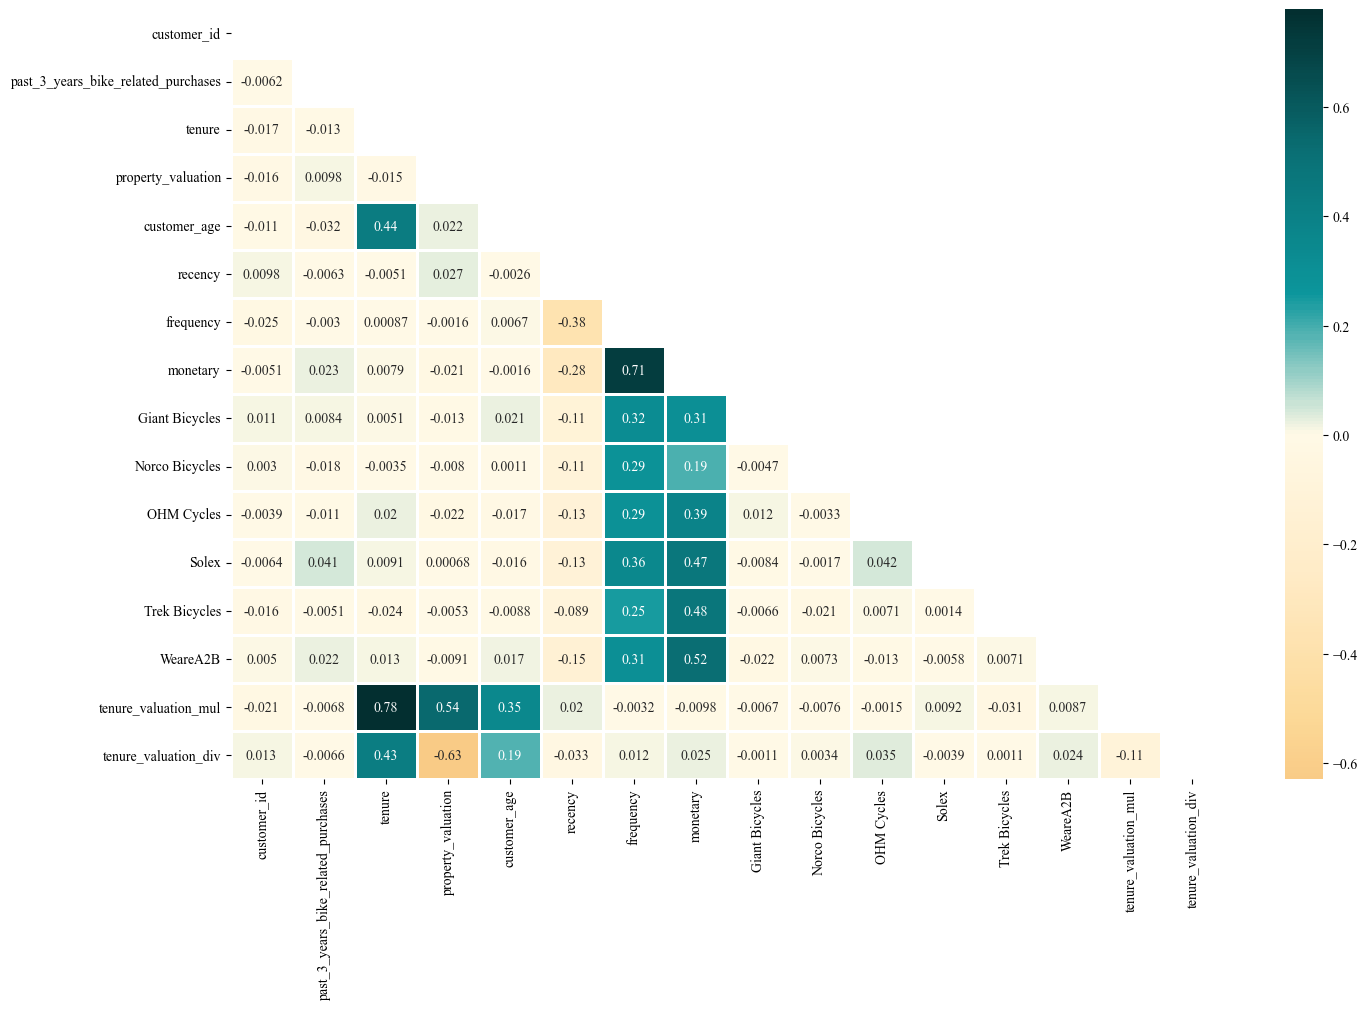

In [ ]:
plt.subplots(figsize=(16, 10))

mask = np.zeros_like(customer_df.select_dtypes(exclude=['object','category', 'datetime', 'datetime64[ns]']).corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(customer_df.select_dtypes(exclude=['object','category', 'datetime', 'datetime64[ns]']).corr(), 
            cmap=cmap_1, mask=mask, annot=True, center=0, linecolor='white', linewidths='1')

plt.show()

In [74]:
customer_df['tenure']

0       11
1       16
2        7
3        8
4       13
        ..
3407    19
3408    18
3409     5
3410     7
3411    17
Name: tenure, Length: 3412, dtype: int64